<a href="https://colab.research.google.com/github/nalrob/Procesamiento_de_datos/blob/main/Practica4_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importación de imagenes

In [1]:
from google.colab import files
uploaded= files.upload()

Saving FIRE_images_zip.zip to FIRE_images_zip.zip
Saving Nuevo.zip to Nuevo.zip


In [2]:
!pwd

/content


In [3]:
import zipfile
import io
data=zipfile.ZipFile(io.BytesIO(uploaded['Nuevo.zip']),'r')
data.extractall()

data2=zipfile.ZipFile(io.BytesIO(uploaded['FIRE_images_zip.zip']),'r')
data2.extractall()

In [4]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import StratifiedShuffleSplit
from keras.preprocessing.image import load_img


sns.set_style('darkgrid')

In [5]:
from PIL import Image

# Lista de carpetas de imágenes y sus etiquetas
folders = [

    ("/content/fire_images", "fire"),
    ("/content/non_fire_images", "non_fire"),
    ("/content/Nuevo/fire_images", "fire"),
    ("/content/Nuevo/non_fire_images", "non_fire"),
]

dfs = []


for folder_path, label in folders:
    data = []
    for dirname, _, filenames in os.walk(folder_path):
        for filename in filenames:
            if filename.endswith(('.jpg', '.jpeg', '.png')):  # Ajusta las extensiones permitidas
                img_path = os.path.join(dirname, filename)
                data.append({'path': img_path, 'label': label})
    df_temp = pd.DataFrame(data)
    dfs.append(df_temp)


df = pd.concat(dfs, ignore_index=True)
df = df.sample(frac=1).reset_index(drop=True)
print(df.head(10))

                                        path     label
0       /content/Nuevo/fire_images/00898.jpg      fire
1  /content/non_fire_images/non_fire.200.png  non_fire
2   /content/non_fire_images/non_fire.75.png  non_fire
3   /content/non_fire_images/non_fire.11.png  non_fire
4  /content/non_fire_images/non_fire.149.png  non_fire
5       /content/Nuevo/fire_images/01148.jpg      fire
6  /content/non_fire_images/non_fire.196.png  non_fire
7  /content/non_fire_images/non_fire.220.png  non_fire
8   /content/Nuevo/non_fire_images/00675.jpg  non_fire
9   /content/Nuevo/non_fire_images/00041.jpg  non_fire


Vectorización de imagenes

In [18]:
#Vectorización

label_mapping = {"fire": 0, "non_fire": 1}

df['label'] = df['label'].replace(label_mapping)
df['label'] = df['label'].fillna(0).astype(int)

print(df[['path', 'label']])


                                          path  label
0         /content/Nuevo/fire_images/00898.jpg      0
1    /content/non_fire_images/non_fire.200.png      1
2     /content/non_fire_images/non_fire.75.png      1
3     /content/non_fire_images/non_fire.11.png      1
4    /content/non_fire_images/non_fire.149.png      1
..                                         ...    ...
733  /content/non_fire_images/non_fire.165.png      1
734       /content/Nuevo/fire_images/00160.jpg      0
735  /content/non_fire_images/non_fire.176.png      1
736          /content/fire_images/fire.157.png      0
737  /content/non_fire_images/non_fire.150.png      1

[738 rows x 2 columns]


In [19]:
import cv2
import numpy as np

X, y = [], []

for index, row in df.iterrows():
    image_path = row['path']
    label = row['label']

    img = cv2.imread(image_path)

#Normalización
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))
        img = img.reshape(64 * 64 * 3)

        X.append(img)
        y.append(label)

X_samp = np.array(X)
y_samp = np.array(y)


In [12]:
X_samp.shape

(737, 12288)

In [13]:
y_samp.shape

(737,)

PCA

In [22]:
from sklearn.decomposition import PCA
pca = PCA(2)

In [23]:
from PIL import Image

def load_and_preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((64, 64))

    return image


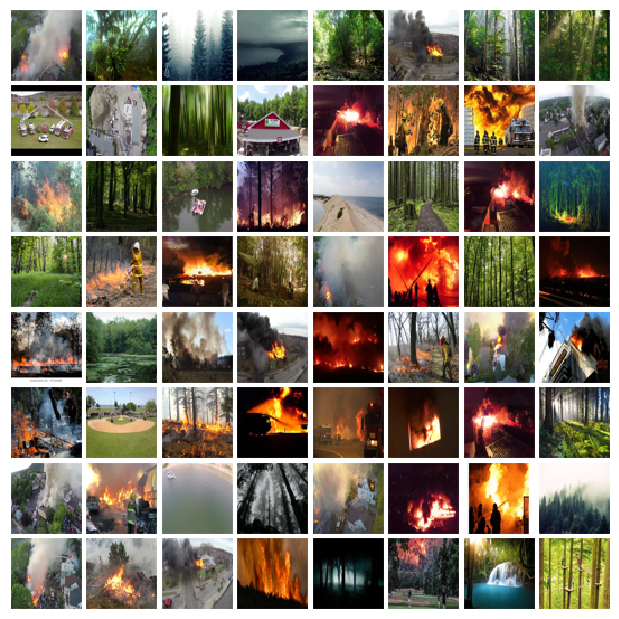

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])

    image_path = df['path'].iloc[i]
    image = load_and_preprocess_image(image_path)  # Implementa esta función según tus necesidades
    ax.imshow(image, cmap=plt.cm.bone, interpolation='nearest')

plt.show()


In [25]:
import numpy

X_samp = numpy.array(X)
y_samp = numpy.array(y)

X_samp = (X_samp/255)
X_samp.shape

(737, 12288)

In [26]:
X,y=X_samp,y_samp
pca_fire = PCA(64)
X_proj = pca_fire.fit_transform(X)
print(X_proj.shape)

(737, 64)


In [27]:
print(np.cumsum(pca_fire.explained_variance_ratio_))

[0.26421226 0.35723826 0.417158   0.46298098 0.50022958 0.53310228
 0.55390702 0.57112227 0.58603683 0.60005153 0.61197834 0.62296256
 0.63260663 0.64150785 0.64958103 0.65715399 0.66381624 0.66987441
 0.67527318 0.68051251 0.68552035 0.69023516 0.6947116  0.69891803
 0.70288371 0.70662773 0.71006868 0.71348492 0.71681665 0.71994533
 0.72289783 0.72576794 0.72852597 0.73115456 0.73370982 0.73614117
 0.73854912 0.74086818 0.74313773 0.74534094 0.74749618 0.74960846
 0.75165801 0.75364061 0.75561467 0.75752988 0.75941802 0.76126355
 0.76307258 0.76483511 0.76655821 0.76825844 0.76989584 0.77150088
 0.77310435 0.77467121 0.7762173  0.77772574 0.77921448 0.78068252
 0.78210177 0.78351606 0.78489892 0.78627638]


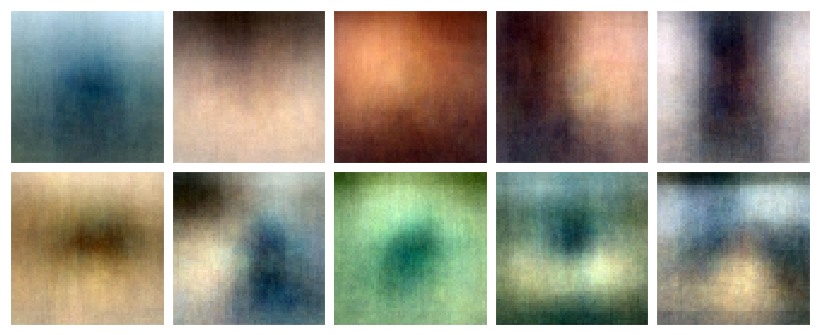

In [34]:
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    component_image = np.reshape(pca_fire.components_[i, :], (64, 64,3))

    # Convertir a escala de grises
    component_image = (component_image - component_image.min()) / (component_image.max() - component_image.min())

    ax.imshow(component_image, cmap='gray', interpolation='nearest')


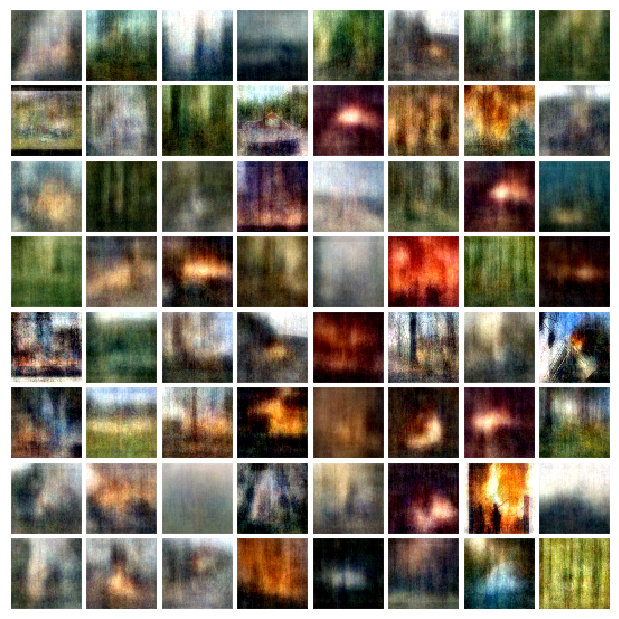

In [32]:
X_inv_proj = pca_fire.inverse_transform(X_proj)
X_proj_img = np.reshape(X_inv_proj,(737,64,64,3))

fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
  ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
  ax.imshow(X_proj_img[i], cmap=plt.cm.bone, interpolation='nearest')

In [49]:
import numpy as np

# Crear una matriz vacía para almacenar los coeficientes de correlación
correlaciones = []

# Iterar a través del conjunto de imágenes
for i in range(len(X_samp)):
    imagen1 = X_samp[i]

    # Calcular la correlación de Pearson entre la primera imagen y las demás
    correlaciones_imagen1 = [np.corrcoef(imagen1.ravel(), imagen2.ravel())[0, 1] for imagen2 in X_samp]

    # Agregar los coeficientes de correlación a la matriz
    correlaciones.append(correlaciones_imagen1)

# Convertir la matriz de coeficientes de correlación a un arreglo NumPy
correlaciones = np.array(correlaciones)

# Mostrar la matriz de coeficientes de correlación
print("Matriz de coeficientes de correlación:")
print(correlaciones)


Matriz de coeficientes de correlación:
[[ 1.          0.22497762  0.42130927 ...  0.20860889  0.17471143
   0.22020974]
 [ 0.22497762  1.          0.53633618 ...  0.51295624  0.20719756
  -0.03457323]
 [ 0.42130927  0.53633618  1.         ...  0.52513454  0.31705399
   0.0347456 ]
 ...
 [ 0.20860889  0.51295624  0.52513454 ...  1.          0.09397342
   0.01760506]
 [ 0.17471143  0.20719756  0.31705399 ...  0.09397342  1.
   0.11371565]
 [ 0.22020974 -0.03457323  0.0347456  ...  0.01760506  0.11371565
   1.        ]]


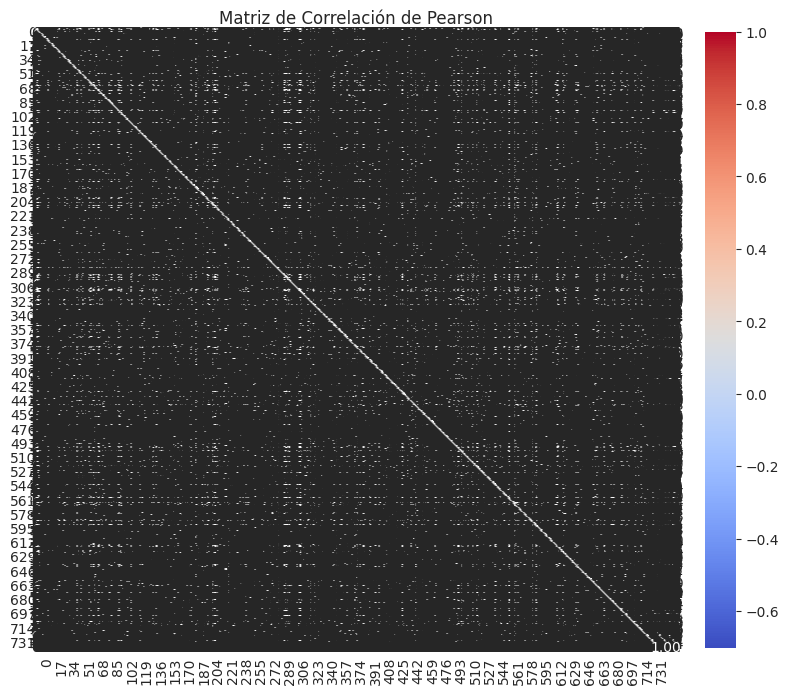

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Pearson')
plt.show()


In [51]:
import numpy as np
from skimage.metrics import structural_similarity as ssim

# Crear una matriz vacía para almacenar los valores de SSIM
ssim_values = []

# Iterar a través del conjunto de imágenes
for i in range(len(X_samp)):
    for j in range(i + 1, len(X_samp)):
        imagen1 = X_samp[i]
        imagen2 = X_samp[j]

        # Calcular el Índice de Similitud Estructural (SSIM) entre las dos imágenes
        ssim_score = ssim(imagen1, imagen2)

        # Agregar el valor de SSIM a la matriz
        ssim_values.append(ssim_score)

# Convertir la lista de valores de SSIM a un arreglo NumPy
ssim_values = np.array(ssim_values)

# Mostrar los valores de SSIM
print("Valores de SSIM entre imágenes:")
print(ssim_values)


Valores de SSIM entre imágenes:
[0.2382982  0.31323812 0.33264961 ... 0.01619358 0.24044676 0.15949628]


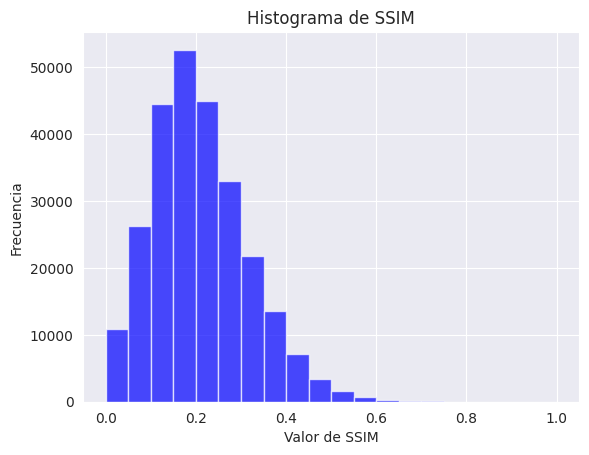

In [53]:
import matplotlib.pyplot as plt

# Crear un histograma de los valores de SSIM
plt.hist(ssim_values, bins=20, range=(0, 1), color='blue', alpha=0.7)
plt.title('Histograma de SSIM')
plt.xlabel('Valor de SSIM')
plt.ylabel('Frecuencia')
plt.show()